In [9]:
import sys
sys.path.append('/Users/liushuhan/Documents/AL_GNN/Experiments/RSP/Sythentic_graph')
sys.path.append('/Users/liushuhan/Documents/AL_GNN/Experiments/RSP/Select_cluster')

sys.path.append('../')

from Generator import *
from solver import *

import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import svm
from sklearn.preprocessing import normalize
import numpy as np
import networkx as nx

### Linear kernel

/Users/liushuhan/Documents/AL_GNN/Experiments/RSP/Sythentic_graph/Generator.py:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  node_mean = torch.tensor(group_mean[group_label[i],])


The true groups for the detected outliers are: [0 0 0 0 2 2 2 2 2 5 5 6 6 7 7 7 8 8 8 8 8 9 9 9 9]


Text(0.5, 1.0, 'Outlier in graph')

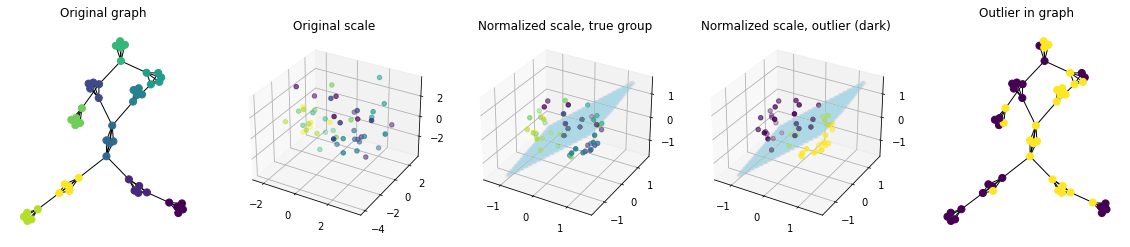

In [14]:
# Generate graph
f = plt.figure(figsize=(20,4))
list_shapes = ['nx.complete_graph'] * 10
list_shapes_args = [[5]] * 10
graph_type = 'nx.connected_watts_strogatz_graph'
graph_args = [10, 2, 0.4]
G, Gg, group_label, shape_label, shape_dist = synthetic_graph_generator(list_shapes, list_shapes_args, graph_type, graph_args, \
    plot=False, plot_color='group_label', savefig=False, root=None, figname=None)
node_features, group_mean = synthetic_feature_generator(group_label, num_features=3, std=1.0, save=False, root=False) 
node_features = node_features.numpy()
group_mean = group_mean.numpy()
group_label = np.array(group_label)
L, Gamma = matrix_generator(G)
pos = nx.spring_layout(G)
ax0 = f.add_subplot(151)
nx.draw(G, pos=pos, node_color=group_label, node_size=50)
plt.title('Original graph')

# Visualize normalized version of orginal node feature
X = normalize(node_features)
upper_bound = 1e-6 # May change the bound to make the scatterplot look like a plane

ax1 = f.add_subplot(152, projection='3d')
ax1.scatter3D(node_features[:,0], node_features[:,1], node_features[:,2], c=group_label)
plt.title('Original scale')

ax2 = f.add_subplot(153, projection='3d')
X = normalize(node_features)
xx, yy, zz = np.meshgrid(np.linspace(-1.5, 1.5, 150), np.linspace(-1.5, 1.5, 150), np.linspace(-1.5, 1.5, 150))
# Fit One-class SVM
clf = svm.OneClassSVM(nu=0.15, kernel="linear").fit(X)
pred_label = clf.predict(X)
# Plot the current margin
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
Z = Z.reshape(xx.shape)
ax2.scatter3D(X[:,0], X[:,1], X[:,2], c=group_label)
ax2.scatter3D(xx[np.abs(Z)<upper_bound], yy[np.abs(Z)<upper_bound], zz[np.abs(Z)<upper_bound], color='lightblue', s=10, alpha=0.01)
plt.title('Normalized scale, true group')

ax3 = f.add_subplot(154, projection='3d')
ax3.scatter3D(X[:,0], X[:,1], X[:,2], c=clf.predict(X))
ax3.scatter3D(xx[np.abs(Z)<upper_bound], yy[np.abs(Z)<upper_bound], zz[np.abs(Z)<upper_bound], color='lightblue', s=10, alpha=0.01)
plt.title('Normalized scale, outlier (dark)')
print('The true groups for the detected outliers are:', group_label[clf.predict(X)==-1])

ax4 = f.add_subplot(155)
nx.draw(G, pos=pos, node_color=clf.predict(X), node_size=50)
ax4.set_title('Outlier in graph')

/Users/liushuhan/Documents/AL_GNN/Experiments/RSP/Sythentic_graph/Generator.py:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  node_mean = torch.tensor(group_mean[group_label[i],])


The true groups for the detected outliers are: [1 1 1 2 2 2 3 3 4 5 5 5 6 6]


Text(0.5, 1.0, 'Outlier in graph')

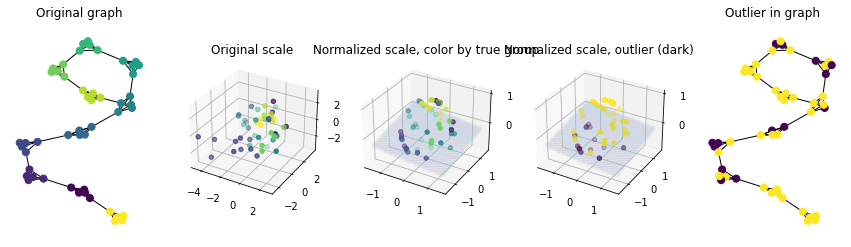

In [11]:
# Generate graph
f = plt.figure(figsize=(15,4))
list_shapes = ['nx.complete_graph'] * 10
list_shapes_args = [[5]] * 10
graph_type = 'nx.connected_watts_strogatz_graph'
graph_args = [10, 2, 0.4]
G, Gg, group_label, shape_label, shape_dist = synthetic_graph_generator(list_shapes, list_shapes_args, graph_type, graph_args, \
    plot=False, plot_color='group_label', savefig=False, root=None, figname=None)
node_features, group_mean = synthetic_feature_generator(group_label, num_features=3, std=1.0, save=False, root=False) 
node_features = node_features.numpy()
group_mean = group_mean.numpy()
group_label = np.array(group_label)
L, Gamma = matrix_generator(G)
pos = nx.spring_layout(G)
ax0 = f.add_subplot(151)
nx.draw(G, pos=pos, node_color=group_label, node_size=50)
plt.title('Original graph')

# Visualize normalized version of orginal node feature
X = normalize(node_features)
upper_bound = 1e-6 # May change the bound to make the scatterplot look like a plane

ax1 = f.add_subplot(152, projection='3d')
ax1.scatter3D(node_features[:,0], node_features[:,1], node_features[:,2], c=group_label)
plt.title('Original scale')

ax2 = f.add_subplot(153, projection='3d')
X = normalize(node_features)
xx, yy, zz = np.meshgrid(np.linspace(-1.5, 1.5, 150), np.linspace(-1.5, 1.5, 150), np.linspace(-1.5, 1.5, 150))
# Fit One-class SVM
clf = svm.OneClassSVM(nu=0.15, kernel="linear").fit(X)
pred_label = clf.predict(X)
# Plot the current margin
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
Z = Z.reshape(xx.shape)
ax2.scatter3D(X[:,0], X[:,1], X[:,2], c=group_label)
ax2.scatter3D(xx[np.abs(Z)<upper_bound], yy[np.abs(Z)<upper_bound], zz[np.abs(Z)<upper_bound], color='lightblue', s=10, alpha=0.01)
plt.title('Normalized scale, color by true group')

ax3 = f.add_subplot(154, projection='3d')
ax3.scatter3D(X[:,0], X[:,1], X[:,2], c=clf.predict(X))
ax3.scatter3D(xx[np.abs(Z)<upper_bound], yy[np.abs(Z)<upper_bound], zz[np.abs(Z)<upper_bound], color='lightblue', s=10, alpha=0.01)
plt.title('Normalized scale, outlier (dark)')
print('The true groups for the detected outliers are:', group_label[clf.predict(X)==-1])

ax4 = f.add_subplot(155)
nx.draw(G, pos=pos, node_color=clf.predict(X), node_size=50)
ax4.set_title('Outlier in graph')

/Users/liushuhan/Documents/AL_GNN/Experiments/RSP/Sythentic_graph/Generator.py:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  node_mean = torch.tensor(group_mean[group_label[i],])


The true groups for the detected outliers are: [0 0 0 2 2 2 2 3 3 4 6 6 9 9 9]


Text(0.5, 1.0, 'Outlier in graph')

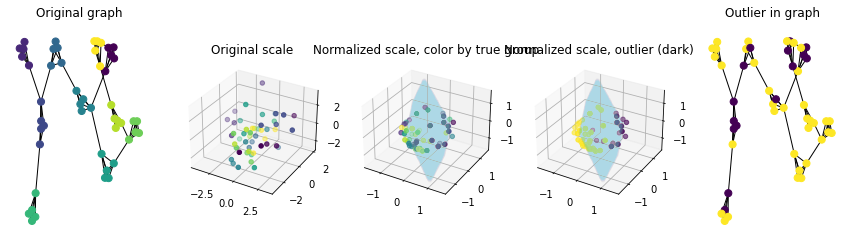

In [12]:
# Generate graph
f = plt.figure(figsize=(15,4))
list_shapes = ['nx.complete_graph'] * 10
list_shapes_args = [[5]] * 10
graph_type = 'nx.connected_watts_strogatz_graph'
graph_args = [10, 2, 0.4]
G, Gg, group_label, shape_label, shape_dist = synthetic_graph_generator(list_shapes, list_shapes_args, graph_type, graph_args, \
    plot=False, plot_color='group_label', savefig=False, root=None, figname=None)
node_features, group_mean = synthetic_feature_generator(group_label, num_features=3, std=1.0, save=False, root=False) 
node_features = node_features.numpy()
group_mean = group_mean.numpy()
group_label = np.array(group_label)
L, Gamma = matrix_generator(G)
pos = nx.spring_layout(G)
ax0 = f.add_subplot(151)
nx.draw(G, pos=pos, node_color=group_label, node_size=50)
plt.title('Original graph')

# Visualize normalized version of orginal node feature
X = normalize(node_features)
upper_bound = 1e-6 # May change the bound to make the scatterplot look like a plane

ax1 = f.add_subplot(152, projection='3d')
ax1.scatter3D(node_features[:,0], node_features[:,1], node_features[:,2], c=group_label)
plt.title('Original scale')

ax2 = f.add_subplot(153, projection='3d')
X = normalize(node_features)
xx, yy, zz = np.meshgrid(np.linspace(-1.5, 1.5, 150), np.linspace(-1.5, 1.5, 150), np.linspace(-1.5, 1.5, 150))
# Fit One-class SVM
clf = svm.OneClassSVM(nu=0.15, kernel="linear").fit(X)
pred_label = clf.predict(X)
# Plot the current margin
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
Z = Z.reshape(xx.shape)
ax2.scatter3D(X[:,0], X[:,1], X[:,2], c=group_label)
ax2.scatter3D(xx[np.abs(Z)<upper_bound], yy[np.abs(Z)<upper_bound], zz[np.abs(Z)<upper_bound], color='lightblue', s=10, alpha=0.01)
plt.title('Normalized scale, color by true group')

ax3 = f.add_subplot(154, projection='3d')
ax3.scatter3D(X[:,0], X[:,1], X[:,2], c=clf.predict(X))
ax3.scatter3D(xx[np.abs(Z)<upper_bound], yy[np.abs(Z)<upper_bound], zz[np.abs(Z)<upper_bound], color='lightblue', s=10, alpha=0.01)
plt.title('Normalized scale, outlier (dark)')
print('The true groups for the detected outliers are:', group_label[clf.predict(X)==-1])

ax4 = f.add_subplot(155)
nx.draw(G, pos=pos, node_color=clf.predict(X), node_size=50)
ax4.set_title('Outlier in graph')